In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "/Users/kyriakikaralis/downloads/citydata.csv"
ride_data = "/Users/kyriakikaralis/downloads/ride_data.csv"

In [14]:
city_data = os.path.join('city_data.csv')
ride_data = os.path.join('ride_data.csv')

df_city = pd.read_csv(city_data)
df_ride = pd.read_csv(ride_data)

# Combine the above two dataframes on "city"
df_merged = pd.merge(df_city, df_ride, on='city')

# rearrange columns
col = [0,3,4,5,1,2]
df_city_ride = df_merged.iloc[:,col]

df_city_ride.head()

,city,date,fare,ride_id,driver_count,type
0,Richardfort,2018-02-24 08:40:38,13.93,5628545007794,38,Urban
1,Richardfort,2018-02-13 12:46:07,14.00,910050116494,38,Urban
2,Richardfort,2018-02-16 13:52:19,17.92,820639054416,38,Urban
3,Richardfort,2018-02-01 20:18:28,10.26,9554935945413,38,Urban
4,Richardfort,2018-04-17 02:26:37,23.00,720020655850,38,Urban


In [29]:
# Create group based on the values in the "city column
group_city = df_city_ride.groupby(['city'])

# Calculate Average Fare ($) Per City
average_fare = group_city['fare'].mean()

# Calculate Total Number of Rides Per City
total_rides = group_city['ride_id'].nunique()

# Calculate Total Number of Drivers Per City
total_drivers = group_city['driver_count'].max()

# Determine City Type 
city_type = group_city['type'].max()

# Create dataframe with results
summary_city = pd.DataFrame({'Average Fare ($)': average_fare,
                          'Total Number of Rides': total_rides,
                          'Total Number of Drivers': total_drivers,
                          'City Type': city_type})
# Group by City Type
# Urban
urban = summary_city.loc[summary_city['City Type'] == 'Urban']
total_rides_urban = urban['Total Number of Rides']
avg_fare_urban = urban['Average Fare ($)']
total_drivers_urban = urban['Total Number of Drivers']

# Suburban
suburban = summary_city.loc[summary_city['City Type'] == 'Suburban']
total_rides_suburban = suburban['Total Number of Rides']
avg_fare_suburban = suburban['Average Fare ($)']
total_drivers_suburban = suburban['Total Number of Drivers']

# Rural
rural = summary_city.loc[summary_city['City Type'] == 'Rural']
total_rides_rural = rural['Total Number of Rides']
avg_fare_rural = rural['Average Fare ($)']
total_drivers_rural = rural['Total Number of Drivers']

summary_city.head()

,Average Fare ($),Total Number of Rides,Total Number of Drivers,City Type
city,,,,
Amandaburgh,24.641667,18,12,Urban
Barajasview,25.332273,22,26,Urban
Barronchester,36.422500,16,11,Suburban
Bethanyland,32.956111,18,22,Suburban
Bradshawfurt,40.064000,10,7,Rural


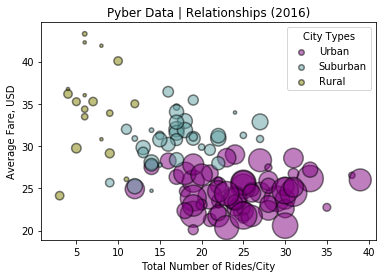

In [41]:
#Making the scatter plot w/ bubbles showing the relationship between fare, location, # of drivers and # of rides

plt.figure()
urban_plot = plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10, 
                         color='purple', alpha=0.5, edgecolor='black', linewidths=1.5, 
                         label='Urban')
suburban_plot = plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10, 
                            color='cadetblue', alpha=0.5, edgecolor='black',linewidths=1.5, 
                            label='Suburban')
rural_plot = plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10, 
                         color='olive', alpha=0.5, edgecolor='black',linewidths=1.5, 
                         label='Rural')

# label chart
plt.title('Pyber Data | Relationships (2016)')
plt.xlabel('Total Number of Rides/City')
plt.ylabel('Average Fare, USD')

# Placing/defining the legend.
lgnd = plt.legend(handles=[urban_plot,suburban_plot,rural_plot], loc ='best',title = 'City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.show()

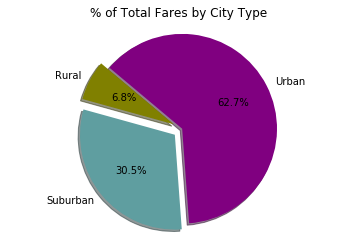

In [31]:
# Percent of Total Fares by City Type
# Group by city type
group_type = df_city_ride.groupby(['type'])

# Calculate total fare per city type
total_fare_all = group_type['fare'].sum()
total_fare_df = pd.DataFrame({'Total Fare Per Type': total_fare_all})

# Calculate percent of each city type
percent_f_per_type = total_fare_df['Total Fare Per Type'] / total_fare_df['Total Fare Per Type'].sum() * 100 
percentages_fare_df = pd.DataFrame({'Percentage': percent_f_per_type})

# Summarize
percent_fare_type = pd.merge(total_fare_df, percentages_fare_df, right_index=True, left_index=True)

percent_f_rural = percent_fare_type.iloc[0][1]
percent_f_suburban = percent_fare_type.iloc[1][1]
percent_f_urban = percent_fare_type.iloc[2][1]

# User bar chart
fexplode = [0.1, 0.1, 0]
flabels = ['Rural', 'Suburban', 'Urban']
percents_fare = [percent_f_rural, percent_f_suburban, percent_f_urban]
fcolors = ['olive', 'cadetblue', 'purple']

plt.pie(percents_fare, labels=flabels, colors=fcolors, explode=fexplode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title('% of Total Fares by City Type')
plt.axis("equal")

plt.show()

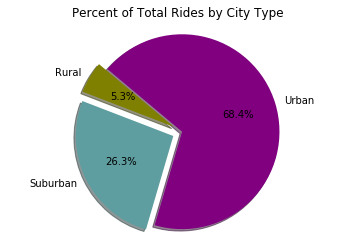

In [34]:
# Percent of Total Rides by City Type

# Total rides per city type
total_rides_all = group_type['ride_id'].nunique()
total_rides_df = pd.DataFrame({'Total Rides Per Type': total_rides_all})

# Percent of each city type
percent_r_per_type = total_rides_df['Total Rides Per Type'] / total_rides_df['Total Rides Per Type'].sum() * 100 
percentages_rides_df = pd.DataFrame({'Percentage': percent_r_per_type})

# Summarize
percent_rides_type = pd.merge(total_rides_df, percentages_rides_df, right_index=True, left_index=True)

percent_r_rural = percent_rides_type.iloc[0][1]
percent_r_suburban = percent_rides_type.iloc[1][1]
percent_r_urban = percent_rides_type.iloc[2][1]

# Chart
rexplode = [0.1, 0.1, 0]
rlabels = ['Rural', 'Suburban', 'Urban']
percents_rides = [percent_r_rural, percent_r_suburban, percent_r_urban]
rcolors = ['olive', 'cadetblue', 'purple']

plt.pie(percents_rides, labels=rlabels, colors=rcolors, explode=rexplode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title('Percent of Total Rides by City Type')
plt.axis("equal")

plt.show()

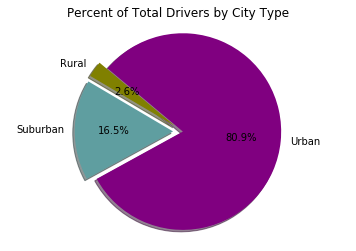

In [35]:
# Percent of Total Drivers by City Type

# Calculate total drivers and total drivers by city type
urban_d = summary_city.loc[summary_city['City Type']=='Urban']
total_urban_d = urban_d['Total Number of Drivers'].sum()

suburban_d = summary_city.loc[summary_city['City Type']=='Suburban']
total_suburban_d = suburban_d['Total Number of Drivers'].sum()

rural_d = summary_city.loc[summary_city['City Type']=='Rural']
total_rural_d = rural_d['Total Number of Drivers'].sum()

total_drivers_all = summary_city['Total Number of Drivers'].sum()

# Calculate percent of each city type
percent_urban_d = total_urban_d / total_drivers_all * 100
percent_suburban_d = total_suburban_d / total_drivers_all * 100
percent_rural_d = total_rural_d / total_drivers_all * 100

# User bar chart
dexplode = [0.1, 0.1, 0]
dlabels = ['Rural', 'Suburban', 'Urban']
percents_drivers = [percent_rural_d, percent_suburban_d, percent_urban_d]
dcolors = ['olive', 'cadetblue', 'purple']

plt.pie(percents_drivers, labels=dlabels, colors=dcolors, explode=dexplode, 
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title('Percent of Total Drivers by City Type')
plt.axis("equal")

plt.show()

## Observations:
### 1)  Almost 81% of drivers reside in urban cities athough only 69% of rides take place in urban areas, which means some urban drivers need to drive to suburban (or, less likely, rural) areas to get enough business (riders).
### 2)  Fares for rural rides are highest, possibly due to miles traveled and lack of drivers (economic competition) in rural areas.
### 3)  Ride fares seem to be most stable/predictable in urban areas, possibly due to the amount of drivers-- and therefore, increased market competition-- in urban areas. It could also be that ride length in urban areas are similar in miles, as people typically aren't traveling as far as they are in suburban or rural areas-- although, that is an assumption, as we don't have miles traveled in our Pyber data. 